In [2]:
frames = 250000000

frames / (3600 * 24)

2893.5185185185187

## Policy Iteration

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import json
from space import Space

index = 3
with open(f'policies/value_function_{index}.json') as json_file:
  value_function = json.load(json_file)
with open(f'policies/policy_{index}.json') as json_file:
  policy = json.load(json_file)

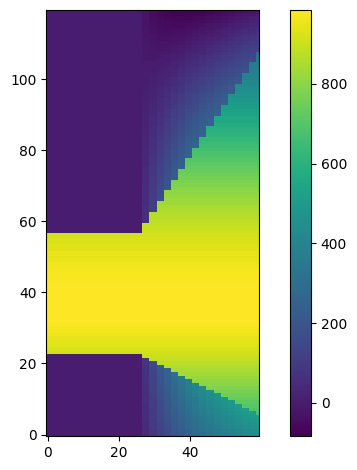

In [175]:
# height = 25
height = 9

values = np.zeros((120, 60))
for i in range(120):
  for j in range(60):
    state = f"({i}, {height}, {j})"
    values[i, j] = value_function[state]

fig, ax = plt.subplots()
im = ax.imshow(values, origin='lower')

fig.colorbar(im)

fig.tight_layout()
plt.savefig("heatmap2.png")

plt.show()

In [99]:
state = (97, 9, 50)
next_state = (98, 9, 48)

print(policy[str(state)], value_function[str(state)])
print(policy[str(next_state)], value_function[str(next_state)])

player_height = state[0] * 8
pipe1_height = (state[1] * 4) + 150
pipe2_height = pipe1_height + 300
pipe_distance = state[2] * 8

print(player_height, pipe1_height, pipe2_height, 40 - (0.5 * (pipe1_height + 10 - player_height)), 40 - (0.5 * (player_height + 80 - pipe2_height)))

1 103.54929132416768
1 75.71824940481733
776 186 486 330.0 -145.0


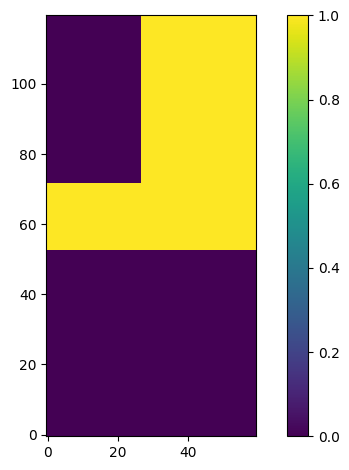

In [240]:
height = '40'
actions = ('0', '1')
values = np.zeros((120, 60))

for state in value_function:
    
    state_player_height, state_pipe_height, state_distance = state.split(',')
    if state_pipe_height.strip() != height:
        continue
    
    i = int(state_player_height.strip()[1:])
    j = int(state_distance.strip()[:-1])
    values[i, j] = policy[state]

fig, ax = plt.subplots()
im = ax.imshow(values, origin="lower")

fig.colorbar(im)

fig.tight_layout()
plt.show()

## SARSA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import sys
from space import Space

def get_value_function_values(height: str, value_function):
    actions = ('0', '1')
    values = np.zeros((120, 60))
    
    for state in value_function:
        
        state_player_height, state_pipe_height, state_distance = state.split(',')
        if state_pipe_height.strip() != height:
            continue
        
        max_value = -sys.maxsize
        for action in actions:
            max_value = max(max_value, value_function[state][action])
        
        i = int(state_player_height.strip()[1:])
        j = int(state_distance.strip()[:-1])
        values[i, j] = max_value

    return values

def get_policy_values(height: str, value_function):
    actions = ('0', '1')
    values = np.zeros((120, 60))
    
    for state in value_function:
        
        state_player_height, state_pipe_height, state_distance = state.split(',')
        if state_pipe_height.strip() != height:
            continue
        
        i = int(state_player_height.strip()[1:])
        j = int(state_distance.strip()[:-1])
        if value_function[state]['0'] > value_function[state]['1']:
            values[i, j] = 1
        else:
            values[i, j] = 0

    return values

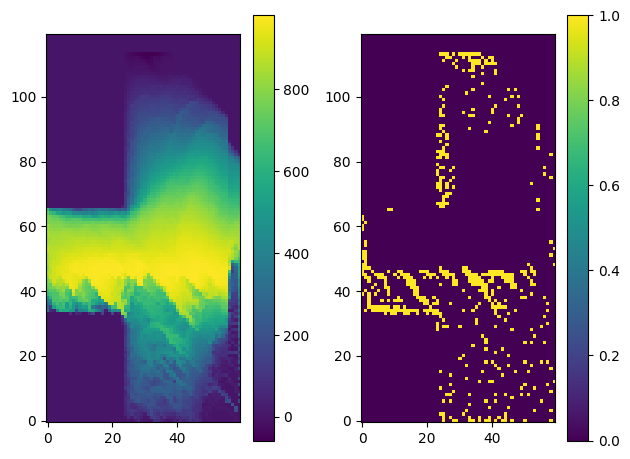

In [8]:
index = 1800
with open(f"action_value_functions/action_value_function_{index}.json") as json_file:
  value_function = json.load(json_file)

pipe_height = '30'
value_function_values = get_value_function_values(pipe_height, value_function)
policy_values = get_policy_values(pipe_height, value_function)

fig = plt.figure()

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(value_function_values, origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

fig.tight_layout()
plt.show()

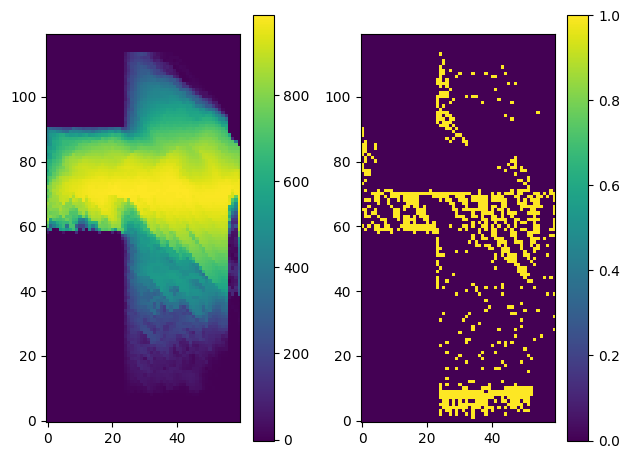

In [12]:
index = 1738
with open(f"action_value_functions/action_value_function_{index}.json") as json_file:
  value_function = json.load(json_file)

height = '80'

value_function_values = get_value_function_values(height, value_function)
policy_values = get_policy_values(height, value_function)

fig = plt.figure()

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(value_function_values, origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

fig.tight_layout()
plt.show()

In [146]:
baseline_value_function = {}

height_range = 90
player_height_range = 120
player_distance_range = 60

for height in range(height_range):

    baseline_value = 0
    for player_height in range(player_height_range):
        for player_distance in range(player_distance_range):
            
            state = f"({player_height}, {height}, {player_distance})"
            if state == "(0, 0, 0)":
                continue
            
            baseline_value += value_function[state]['0']
            baseline_value += value_function[state]['1']

    baseline_value /= (player_height_range * player_distance_range * 2)

    for player_height in range(player_height_range):
        for player_distance in range(player_distance_range):
            
            state = f"({player_height}, {height}, {player_distance})"
            baseline_value_function[state] = {'0': baseline_value, '1': baseline_value}

with open(f"action_value_functions/baseline_value_function.json", "w") as file:
        json.dump(baseline_value_function, file)

In [9]:
from td_sarsa import TdSarsa
from time import perf_counter

action_value_indices = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 
                          900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
                          1700, 1800]

for index in action_value_indices:
    START_TIME = perf_counter()
    action_value_function_path = f"action_value_functions/action_value_function_{index}.json"
    print(f"Playing with action value function # {index}")
    
    model = TdSarsa(action_value_function_path, use_starting_value_function=True, alpha=0.1, gamma=0.9, epsilon=0.01)
    model.play_with_statistics(f"td_sarsa_statistics/action_value_function_{index}", max_frame_count=10000000)

    print(perf_counter() - START_TIME)

Playing with action value function # 1
1000000 0 2 297.0991325
2000000 0 2 594.2010321
3000000 0 3 888.0673431
4000000 0 3 1182.3984426
5000000 0 3 1478.392987
6000000 0 3 1774.3861487000001
7000000 0 3 2069.0849426000004
8000000 0 3 2363.4941753000003
9000000 0 3 2658.1495084999997
10000000 1 3 2955.5014561999997
3000.3002572
Playing with action value function # 10
1000000 0 4 305.4148819000002
2000000 0 4 612.2265289000002
3000000 0 4 919.4019474000002
4000000 0 4 1226.355247
5000000 0 4 1533.1031315000005
6000000 0 4 1839.3032337
7000000 0 4 2146.7466792
8000000 0 4 2453.1245157999997
9000000 0 4 2760.1001014
10000000 1 4 3066.7739589
3105.6403274
Playing with action value function # 100
1000000 0 4 294.73576910000065
2000000 0 4 590.9167785000009
3000000 0 4 887.2917142000006
4000000 0 5 1183.3520817000008
5000000 0 5 1479.5779135000002
6000000 0 5 1776.3016191999995
7000000 0 5 2072.6238434999996
8000000 0 5 2369.030757100001
9000000 0 5 2665.5435694999996
10000000 0 5 2961.672812

In [24]:
import statistics

action_value_indices = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 
                          900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
                          1700, 1800]

for index in action_value_indices:
    action_value_function_path = f"td_sarsa_statistics/action_value_function_{index}/scores.txt"

    with open(action_value_function_path, "r") as file:
        scores = file.read()[1:-1].split(", ")
        for score_index, score in enumerate(scores):
            scores[score_index] = int(score)
        
        print(index, len(scores), statistics.mean(scores), statistics.variance(scores))

1 73810 0.058460913155398996 0.0608698283371195
10 60705 0.18270323696565358 0.19251842380755693
100 52528 0.3520408163265306 0.34980222027699653
200 44810 0.5860522204864985 0.6426093561071227
300 32328 1.1637589705518436 1.502120828097211
400 21803 2.197358161720864 3.670570031653753
500 17581 2.9283317217450655 8.604419679715516
600 12304 4.611752275682705 21.055380039090977
700 7791 7.82171736619176 56.46102251882418
800 8319 7.271787474456064 48.855071954827466
900 3604 17.994450610432853 338.8825670308656
1000 3233 20.14692236313022 395.8407214967553
1100 3490 18.602865329512895 337.26499608675977
1200 3089 21.137908708319845 432.25105274943513
1300 3046 21.476362442547604 462.2679139887893
1400 3666 17.667484997272233 286.65966281355384
1500 2997 21.82349015682349 462.6273786024565
1600 3371 19.296647878967665 376.6882350507514
1700 2555 25.73894324853229 618.1726214356974
1800 2711 24.223164883806714 563.8184447399619


1 73810 0.058460913155398996 0.0608698283371195
10 60705 0.18270323696565358 0.19251842380755693
100 52528 0.3520408163265306 0.34980222027699653
200 44810 0.5860522204864985 0.6426093561071227
300 32328 1.1637589705518436 1.502120828097211
400 21803 2.197358161720864 3.670570031653753
500 17581 2.9283317217450655 8.604419679715516
600 12304 4.611752275682705 21.055380039090977
700 7791 7.82171736619176 56.46102251882418
800 8319 7.271787474456064 48.855071954827466
900 3604 17.994450610432853 338.8825670308656
1000 3233 20.14692236313022 395.8407214967553
1100 3490 18.602865329512895 337.26499608675977
1200 3089 21.137908708319845 432.25105274943513
1300 3046 21.476362442547604 462.2679139887893
1400 3666 17.667484997272233 286.65966281355384
1500 2997 21.82349015682349 462.6273786024565
1600 3371 19.296647878967665 376.6882350507514
1700 2555 25.73894324853229 618.1726214356974
1800 2711 24.223164883806714 563.8184447399619


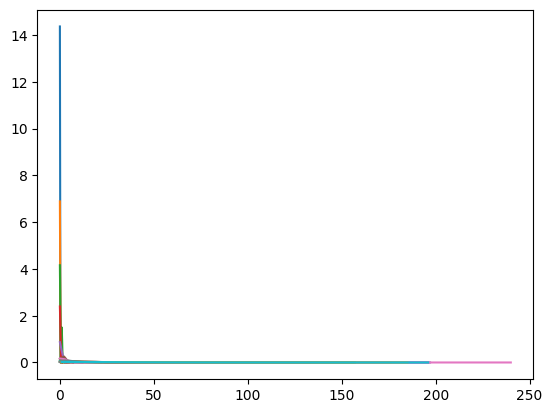

In [33]:
import matplotlib.pyplot as plt
import scipy.stats as stats

index = 1800

plot_values = []

for index in action_value_indices:
    action_value_function_path = f"td_sarsa_statistics/action_value_function_{index}/scores.txt"
    
    with open(action_value_function_path, "r") as file:
        scores = file.read()[1:-1].split(", ")
        for score_index, score in enumerate(scores):
            scores[score_index] = int(score)
        
        print(index, len(scores), statistics.mean(scores), statistics.variance(scores))

    n, x, _, = plt.hist(scores, histtype=u'step', density=True)
    plt.clf()

    density = stats.gaussian_kde(scores)
    plot_values.append((x, density(x)))
    # plt.plot(x, density(x))

for x, density in plot_values:
    plt.plot(x, density)

plt.show()